<a href="https://colab.research.google.com/github/Taylor-X01/Optimization-Algorithms/blob/main_project/Line_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sympy import *
from sympy.abc import x,y
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline


In [3]:
def plot(f,lb,ub,points_x=None,points_y=None):

  f_lambda = lambdify(x,f)

  fig = plt.figure(figsize=(30, 10))
  X = np.linspace(lb, ub, 5500)
  ax = fig.gca()

  plt.plot(X,f_lambda(X))
  if (points_x != None) or (points_y != None):
    plt.plot(points_x,points_y,'xr',ms=10)
  plt.grid(b=True, which='major', color='#666666', linestyle='-')
  plt.minorticks_on()
  plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

  plt.show()

## Bissection Method

$$
Let\ f:\mathbb{R}\rightarrow\mathbb{R}\ and\ a<b \in\mathbb{R} : f'(a) \times f'(b)<0\\
  \  
$$

In [4]:
def bissection(fct,a,b,err=0.05, verbose=False):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)
  f_a = f_prime(a)
  f_b = f_prime(b)
  result = [[a,b],[f(a),f(b)]]
  if f_a*f_b<0:
    print("Success")
    while (abs(b-a)>err) and (f_prime(a)<0 and f_prime(b)>0):
      c = (a+b)/2
      result[0].append(c)
      result[1].append(f(c))
      if verbose:
        print("c = ",c)
      f_c = f_prime(c)
      if verbose:
        print("f'(c) = ",f_c)
      if f_c <= 0 : a = c
      else: b = c
    if verbose:  
      print("2D: [x,f(x)] == ",[a,f(a)])
    return result
  else: print("Failed")


### Test functions :
$$
f(x)=x^2+5x+2
$$

Function : x**2 + 5*x + 2
Success
[x*,f(x*)] [-2.5, -4.25]


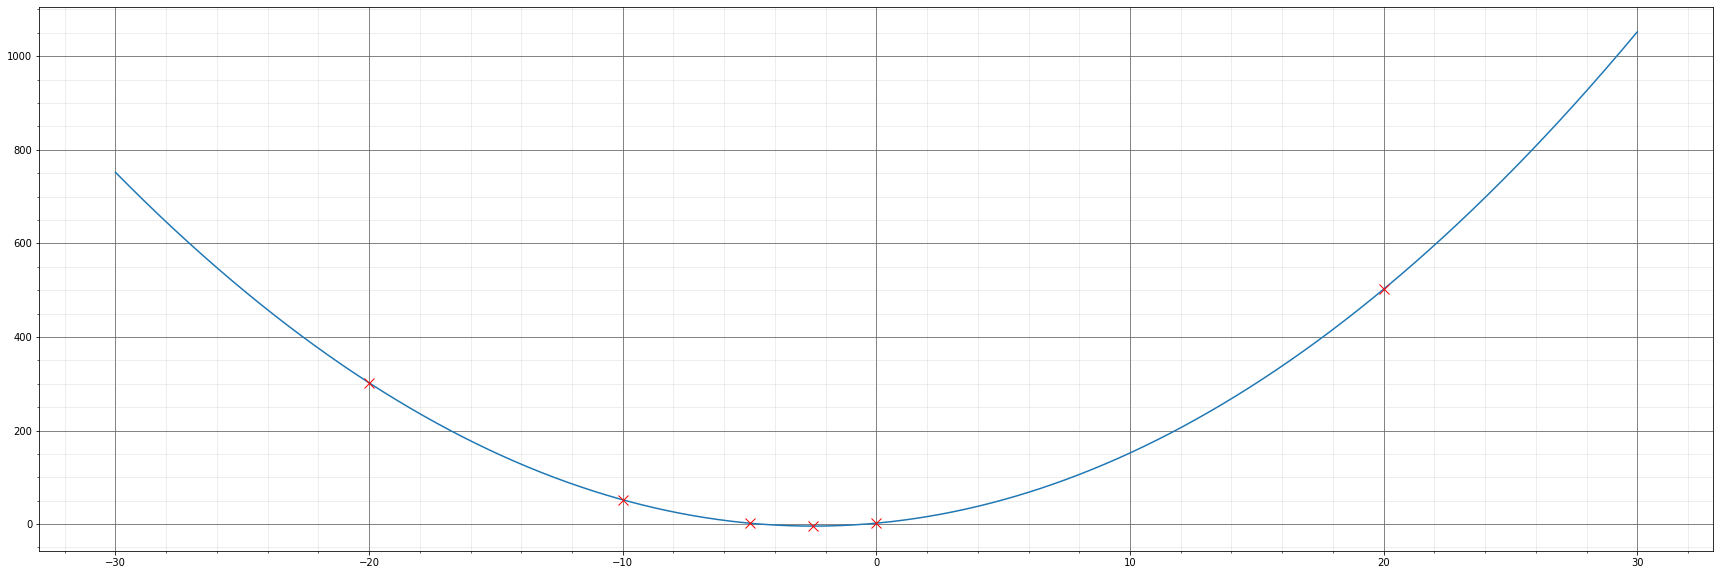

In [14]:

f1 = (x**2+5*x+2)

results = bissection(f1,-20,20,0.02)
print("[x*,f(x*)]",[results[0][-1],results[1][-1]])
plot(f1,-30,30,results[0],results[1])



## Secant Method

$$
Secant's\ Method\ :\ x_{k+1}=x_{k}-\frac{f(x_k)}{ \left[ \frac{f(x_k)-f(x_{k-1})}{x_k - x_{k-1}}\right]}\\
To\ find\ the\ minimal\ point\ of\ the\ function\ f:\mathbb{R}\rightarrow \mathbb{R}\\
x_{k+1}=x_{k}-\frac{f'(x_k)}{ \left[ \frac{f'(x_k)-f'(x_{k-1})}{f(x_k) - f(x_{k-1})}\right]}
$$

In [ ]:
def secant(fct,x0,x1,err=0.005):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  print(fct_prime)

  x_k = x1
  x_k_1 = x0

  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x_k)
  f_prime_xk_1 = f_prime(x_k_1) 

  while (abs(x_k - x_k_1) > err) and (abs(f_prime_xk) > err):

    x_k1 = x_k-(f_prime_xk/ ( (f_prime_xk-f_prime_xk_1)/(f(x_k) - f(x_k_1)) ) )
    x_k_1 = x_k
    x_k = x_k1
    print("x_k: ",x_k)
    print("x_k-1: ",x_k_1)
    f_prime_xk = f_prime(x_k)
    f_prime_xk_1 = f_prime(x_k_1)
    print("f_prime_xk : ",f_prime_xk)
    print("f_prime_xk-1 : ",f_prime_xk_1) 


  if abs(f_prime_xk) < err:
    print([x_k,f(x_k)])
    return [x_k,f(x_k)]
  print("ERREUR DE CALCUL")



In [ ]:
f4 = sin(cos(exp(x)))
f4_prime = 2*x+4
secant(f4,1,1.5)
plot(f4_prime,-2,2)
plot(f4,-1,1.5)


## Newton-Raphson Method

$$
Newton's\ Method\ :\ x_{k+1}=x_{k}-\frac{f(x_k)}{f'(x_k)}\\
To\ find\ the\ minimal\ point\ of\ the\ function\ f:\mathbb{R}\rightarrow \mathbb{R}\\
x_{k+1}=x_{k}-\frac{f'(x_k)}{f''(x_k)}
$$

In [ ]:
def newton(fct,x0,err=0.05):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  fct_second = fct.diff(x,2)
  print(fct_prime)
  print(fct_second)

  cpt = 0
  x_k = x0

  f_prime = lambdify(x,fct_prime)
  f_second = lambdify(x,fct_second)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x0) 
  f_second_xk = f_second(x0)
  print("f'(x0) = ",f_prime_xk)
  print("f''(x0) = ",f_second_xk)
  print("Need to be : f'(x0) != 0")
  if (f_prime_xk != 0) and (f_second_xk > 0):
    while (abs(f_prime_xk) > err):
      print ("cpt = ",cpt)
      cpt+=1
      x_k1 = x_k-(f_prime_xk/f_second_xk)
      x_k = x_k1
      print("x_k: ",x_k)
      f_prime_xk = f_prime(x_k)
      print("f_prime_xk : ",f_prime_xk) 
      f_second_xk = f_second(x_k)
      print("f_second_xk : ",f_second_xk)
      
    if abs(f_prime_xk) < err:
      print("[x,f(x)] = ",[x_k,f(x_k)])
      return [x_k,f(x_k)]
  print("ERREUR DE CALCUL")



## False Position Method - Regula Falsi

$$
False\ Position's\ method\ :\  x_{k+1}=x_k-f'(x_k)\times\frac{(x_k-x_{k-1})}{f'(x_k)-f'(x_{k-1})}
$$

In [ ]:
def regula_falsi(fct,x0,x1,err=0.005):
  print("Function :",fct)
  fct_prime = fct.diff(x)
  print(fct_prime)

  x_k = x1
  x_k_1 = x0

  f_prime = lambdify(x,fct_prime)
  f = lambdify(x,fct)

  f_prime_xk = f_prime(x_k)
  f_prime_xk_1 = f_prime(x_k_1) 

  while (abs(x_k - x_k_1) > err) and (abs(f_prime_xk) > err):
    x_k1 = x_k-(f_prime_xk * (x_k - x_k_1)/ (f_prime_xk-f_prime_xk_1)  )
    x_k_1 = x_k
    x_k = x_k1
    print("x_k: ",x_k)
    print("x_k-1: ",x_k_1)
    f_prime_xk = f_prime(x_k)
    f_prime_xk_1 = f_prime(x_k_1)
    print("f_prime_xk : ",f_prime_xk)
    print("f_prime_xk-1 : ",f_prime_xk_1) 


  if abs(f_prime_xk) < err:
    print([x_k,f(x_k)])
    return [x_k,f(x_k)]
  print("ERREUR DE CALCUL")


## Bissection - Newton's Method (Hybrid)

In [ ]:
def bissection_newton(fct,a,b,err=.05):
  print("\n\nBissection :\n")
  x,f_x = bissection(fct,a,b,1)
  print("\n\nNewton : \n")
  x,f_x = newton(fct,x,err)
  return [x,f_x]

## Comparison < Newton, Bissection, Hybrid >

In [ ]:
# f3 = x**2+5*x
f3 = sin(cos(exp(x)))
f3_prime = -exp(x)*sin(exp(x))*cos(cos(exp(x)))

print("\n\n\n ~~> Newton's Method \n")
nwtn = newton(f3,0.8)
# result: 1.1494460852213106, -0.8414113953797868
#         f'(x*) = 0.02533145117663931

print("\n\n\n ~~> Bissection's Method\n")
biss = bissection(f3,0,1.7,v=True)
# result: 1.1421875, -0.8414537940888557
#         f'(x*) = -0.013506376215777379

print("\n\n\n ~~> Bissection-Newton's Method\n")
biss_nwtn = bissection_newton(f3,-2,1.8) # Precise et nous donne une marge plus grande pour choisir les points initiaux 
# result: 1.1450208128703885, -0.8414707590717263
#         f'(x*) = 0.0015520666672475564

plot(f3_prime,-2,2)
plt.plot(nwtn[0],nwtn[1],'og',label="Newton") # Newton
plt.plot(biss[0],biss[1],'xb',label="Bissection")  # Bissection
plt.plot(biss_nwtn[0],biss_nwtn[1],'.r',label="Bissection-Newton") # Bissection-Newton
plt.legend()
plot(f3,-2,2)